In [ ]:
#import laberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#load dataset
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
df = x.copy()
df['target']=y
df.to_csv("breast_cancer_data_csv:",index = False)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_test)
acc = accuracy_score(y_test, y_pre)

print("Accuracy",accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassifictioN Report :\n",classification_report(y_test, y_pred))



Accuracy 0.9649122807017544

Confusion Matrix:
 [[41  2]
 [ 2 69]]

ClassifictioN Report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



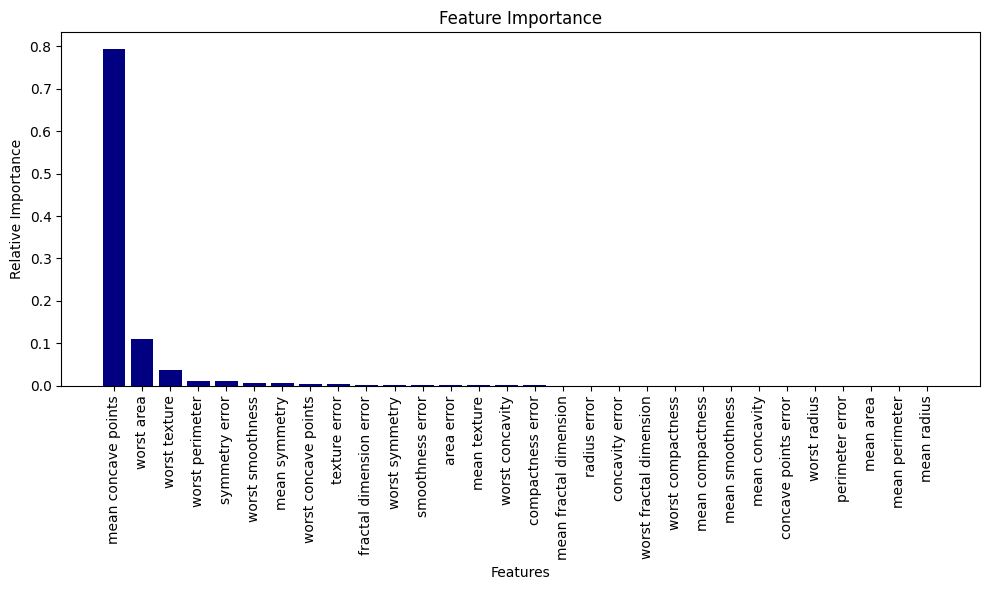

In [ ]:
#step 6 : Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features=x.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], color="navy", align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Relative Importance")
plt.tight_layout()
plt.show()